# <a id='toc1_'></a>[Predicción Tipo Sistema Operativo - Regresión Logística](#toc0_)

**Tabla de contenidos**<a id='toc0_'></a>    
- [Predicción Tipo Sistema Operativo - Regresión Logística](#toc1_)    
  - [Importamos librerías](#toc1_1_)    
  - [Cargamos los datos de entrada del archivo csv](#toc1_2_)    
  - [Visualizamos los datos](#toc1_3_)    
  - [Creamos el modelo](#toc1_4_)    
  - [Reporte de resultados](#toc1_5_)    
- [Clasificación de nuevos registros](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Importamos librerías](#toc0_)

In [23]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## <a id='toc1_2_'></a>[Cargamos los datos de entrada del archivo csv](#toc0_)

In [26]:
dataframe = pd.read_csv("./datasets/train.csv")
dataframe.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,725,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,712833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7925,NaN,S
3,4,1,1,female,35.0,1,0,113803,531,C123,S
4,5,0,3,male,35.0,0,0,373450,805,NaN,S
5,6,0,3,male,NaN,0,0,330877,84583,NaN,Q
6,7,0,1,male,54.0,0,0,17463,518625,E46,S
7,8,0,3,male,2.0,3,1,349909,21075,NaN,S
8,9,1,3,female,27.0,0,2,347742,111333,NaN,S
9,10,1,2,female,14.0,1,0,237736,300708,NaN,C


El método dataframe.describe() nos dará algo de información estadística básica de nuestro set de datos. La Media, el desvío estándar, valores mínimo y máximo de cada característica.

In [27]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,38.420168,0.523008,0.381594,1.276607e+05
std,257.353842,0.486592,0.836071,56.525211,1.102743,0.806057,4.111230e+05
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,1.610000e+02
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,2.625000e+03
75%,668.500000,1.000000,3.000000,40.000000,1.000000,0.000000,7.895800e+04
max,891.000000,1.000000,3.000000,705.000000,8.000000,6.000000,5.123292e+06


En este paso comprobamos cuantas observaciones tenemos de cada tipo usando la función groupby. Se observa que tenemos 86 usuarios “Clase 0”, es decir Windows, 40 usuarios Mac, "Clase 1" y 44 de Linux, "Clase 2".

In [28]:
print(dataframe.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


## <a id='toc1_3_'></a>[Visualizamos los datos](#toc0_)

Graficamos los histogramas de las cuatro "features"(variables independientes o características) de entrada con los nombres “duración”, “páginas”,”acciones” y “valor”. Observamos entre qué valores se mueven sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros.

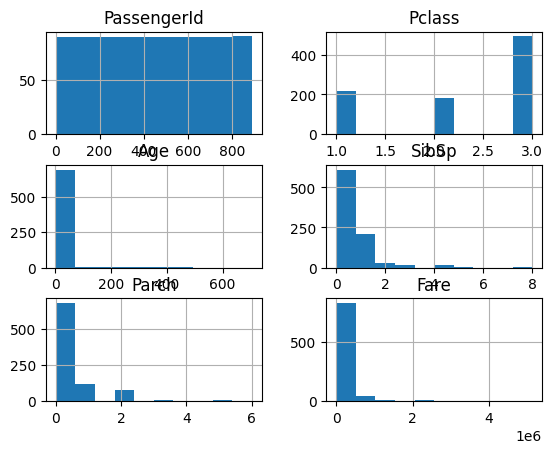

In [29]:
dataframe.drop(['Survived'],axis=1).hist()
plt.show()

## <a id='toc1_4_'></a>[Creamos el modelo](#toc0_)

Cargamos las variables de las 4 columnas de entrada en **X** (conjunto de variables independientes y, por tanto, variables de entrada) excluyendo la columna “clase” (variable de salida) usando el método drop().  
Para comprobar las predicciones, agregamos la columna “clase” en la variable **y** (variable de salida).   
Con la función **X.shape()** comprobamos la dimensión de nuestra matriz con datos de entrada (170 registros/filas por 4 columnas).



In [30]:
X = np.array(dataframe.drop(['Survived'],axis=1))
y = np.array(dataframe['Survived'])
X.shape

(891, 10)

Pasamos a crear y entrenar nuestro modelo de Regresión Logística

In [31]:
model = linear_model.LogisticRegression()
model.fit(X,y)

ValueError: could not convert string to float: 'male'

Lanzamos las predicciones y tomamos como muestra las 5 primeras

In [13]:
predictions = model.predict(X)
print(predictions[0:5])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## <a id='toc1_5_'></a>[Reporte de resultados](#toc0_)

Comprobamos, usando la función **score()**, la precisión media de las predicciones del modelo

In [14]:
model.score(X,y)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Comprobamos la EXACTITUD o ACCURACY  

Es la proporción de todas las clasificaciones correctas, ya sean positivas o negativas. Se define matemáticamente de la siguiente manera:   

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Accuracy</mtext>
  <mo>=</mo>
  <mfrac>
    <mtext>clasificaciones correctas</mtext>
    <mtext>clasificaciones totales</mtext>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>T</mi>
      <mi>P</mi>
      <mo>+</mo>
      <mi>T</mi>
      <mi>N</mi>
    </mrow>
    <mrow>
      <mi>T</mi>
      <mi>P</mi>
      <mo>+</mo>
      <mi>T</mi>
      <mi>N</mi>
      <mo>+</mo>
      <mi>F</mi>
      <mi>P</mi>
      <mo>+</mo>
      <mi>F</mi>
      <mi>N</mi>
    </mrow>
  </mfrac>
</math>


In [15]:
print(accuracy_score(y, predictions))

NameError: name 'predictions' is not defined

Comprobamos la SENSIBILIDAD del modelo.   

La sensibilidad o tasa de verdaderos positivos (TPR) (Recall en inglés), se corresponde con la proporción de todos los positivos reales que se clasificaron correctamente como positivos.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Recall (or TPR)</mtext>
  <mo>=</mo>
  <mfrac>
    <mtext>positivos reales clasificados correctamente</mtext>
    <mtext>todos los positivos reales</mtext>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>T</mi>
      <mi>P</mi>
    </mrow>
    <mrow>
      <mi>T</mi>
      <mi>P</mi>
      <mo>+</mo>
      <mi>F</mi>
      <mi>N</mi>
    </mrow>
  </mfrac>
</math>

In [16]:
print(recall_score(y, predictions, average='weighted'))

NameError: name 'predictions' is not defined

Comprobamos la PRECISION del modelo.   

Es la proporción de todas las clasificaciones positivas del modelo que realmente son positivas. Matemáticamente, se define de la siguiente manera:


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Precision</mtext>
  <mo>=</mo>
  <mfrac>
    <mtext>positivos reales clasificados correctamente</mtext>
    <mtext>todos los clasificados como positivos</mtext>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>T</mi>
      <mi>P</mi>
    </mrow>
    <mrow>
      <mi>T</mi>
      <mi>P</mi>
      <mo>+</mo>
      <mi>F</mi>
      <mi>P</mi>
    </mrow>
  </mfrac>
</math>

In [17]:
print(precision_score(y, predictions, average='weighted'))

NameError: name 'predictions' is not defined

Revisamos el valor de la PUNTUACIÓN F1.   

El F1-score, también llamado F-score o medida F, es un estimador de la capacidad de clasificación. 

Los valores posibles del F1-score oscilan entre 0 y 1. Una clasificador perfecto tiene un F1-score = 1. En el otro extremo, el valor mínimo posible es 0, que indica que el clasificador, realmente, no lleva a cabo su trabajo.

In [18]:
print(f1_score(y, predictions, average='weighted'))

NameError: name 'predictions' is not defined

Por último, revisamos y mostramos la MATRIZ DE CONFUSIÓN

In [19]:
print(confusion_matrix(y, predictions))

NameError: name 'predictions' is not defined

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix(y,predictions)).plot()

NameError: name 'predictions' is not defined

In [21]:
print(classification_report(y, predictions))

NameError: name 'predictions' is not defined

# <a id='toc2_'></a>[Clasificación de nuevos registros](#toc0_)

Como último paso, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

Tiempo Duración: 10
Paginas visitadas: 3
Acciones al navegar: 5
Valoración: 9  

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [22]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
prediccion = model.predict(X_new)
print(prediccion)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.